<h2>Sparks Foundation GRIP DSBA Task 6:-<br>Prediction Using Decision Tree Algorithm</h2><br>
<h3>by :-</h3>Mayur Chilamwar

<h2>Problem Statement</h2><br>
<li>Create the Decision Tree classifier and visualize it graphically.
<li> The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.

<h3>Importing Required Libraries</h3>

In [2]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sns




<h3>Importing Dataset</h3>

In [18]:
df=pd.read_csv('Iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

<h3>Data Preprocessing and Bivariate Analysis</h3> 

In [19]:
df.drop(columns=['Id'],axis=1,inplace=True)




In [20]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [22]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


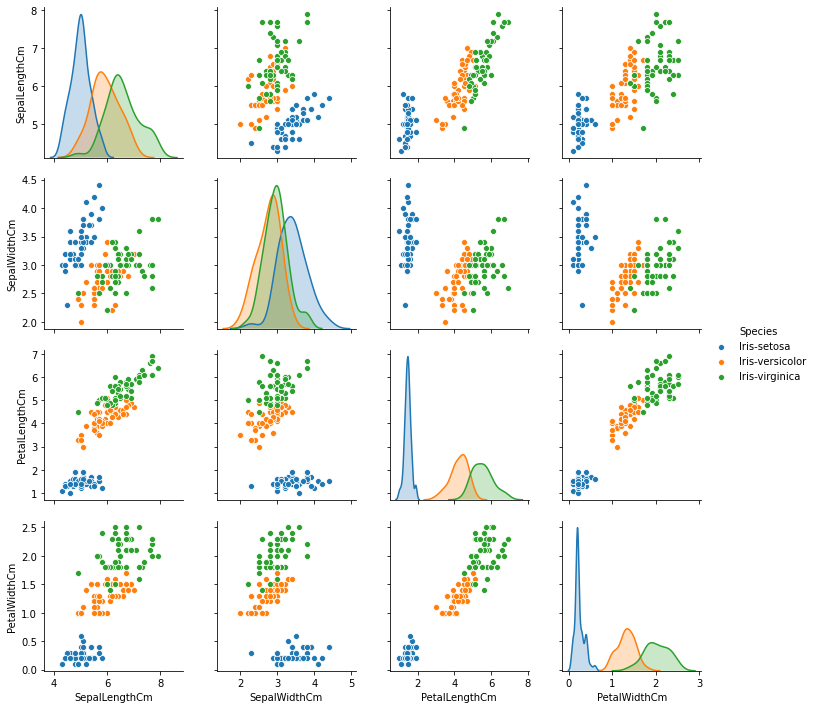

In [21]:
sns.pairplot(df,hue='Species')

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

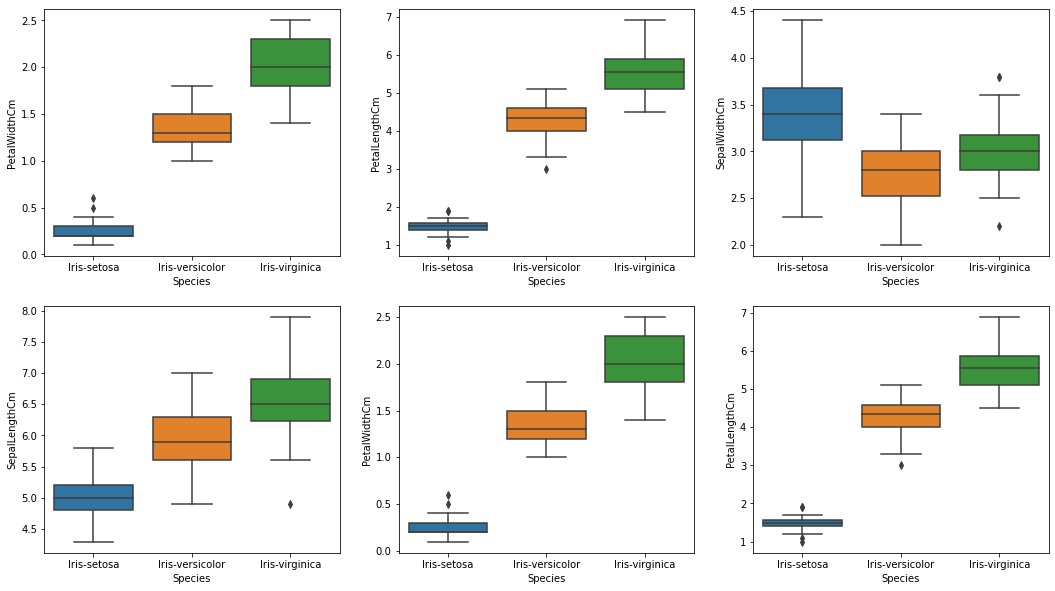

In [26]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.boxplot(ax=axes[0, 0], data=df, x='Species', y='PetalWidthCm') 
sns.boxplot(ax=axes[0, 1], data=df, x='Species', y='PetalLengthCm') 
sns.boxplot(ax=axes[0, 2], data=df, x='Species', y='SepalWidthCm') 
sns.boxplot(ax=axes[1, 0], data=df, x='Species', y='SepalLengthCm') 
sns.boxplot(ax=axes[1, 1], data=df, x='Species', y='PetalWidthCm') 
sns.boxplot(ax=axes[1, 2], data=df, x='Species', y='PetalLengthCm')

In [27]:
le=LabelEncoder()

df['Species']=le.fit_transform(df['Species'])

df.head()





,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<h3>Splitting Dataset</h3>

In [28]:
y=df['Species']
df.drop(columns=['Species'],axis=1,inplace=True)



In [30]:
x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=0.3)

In [31]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((105, 4), (45, 4), (105,), (45,))

<H3>Training Dataset </h3>

In [32]:
dsc=DecisionTreeClassifier()
dsc.fit(x_train,y_train)
print("Decision Tree created succesfully ")



Decision Tree created succesfully 


In [33]:
pred=dsc.predict(x_test)

In [42]:

print("Model Accuracy is = ",round(metrics.accuracy_score(y_test,pred),2),"%")


Model Accuracy is =  0.96 %


<H3>Visualization of Dicision Tree</h3>

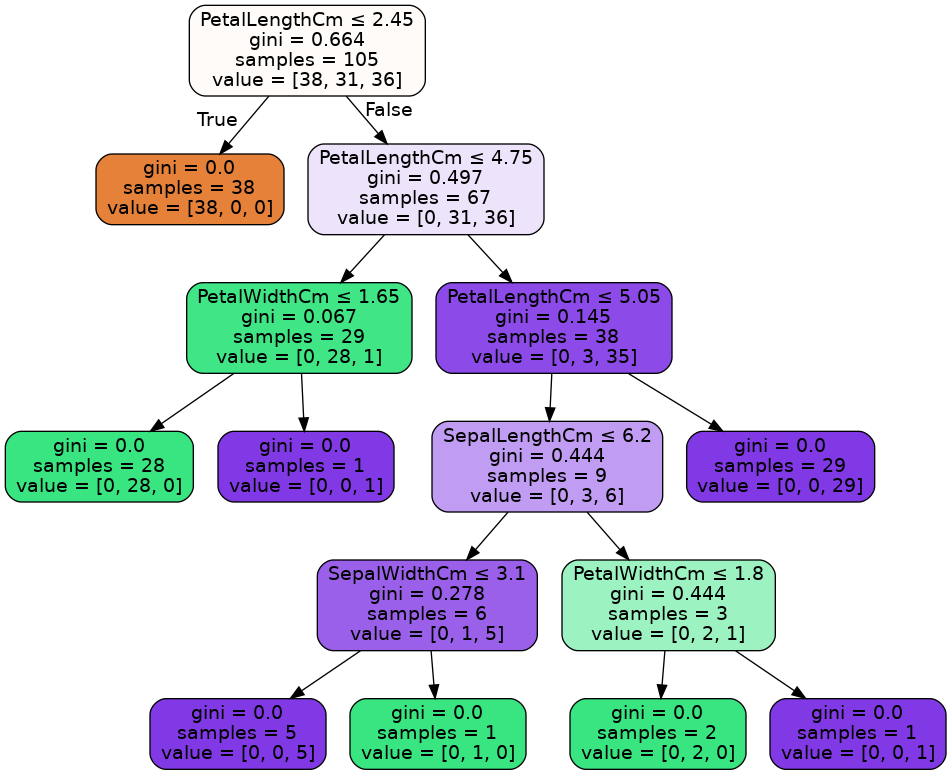

In [43]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dsc, out_file=dot_data, feature_names=df.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())




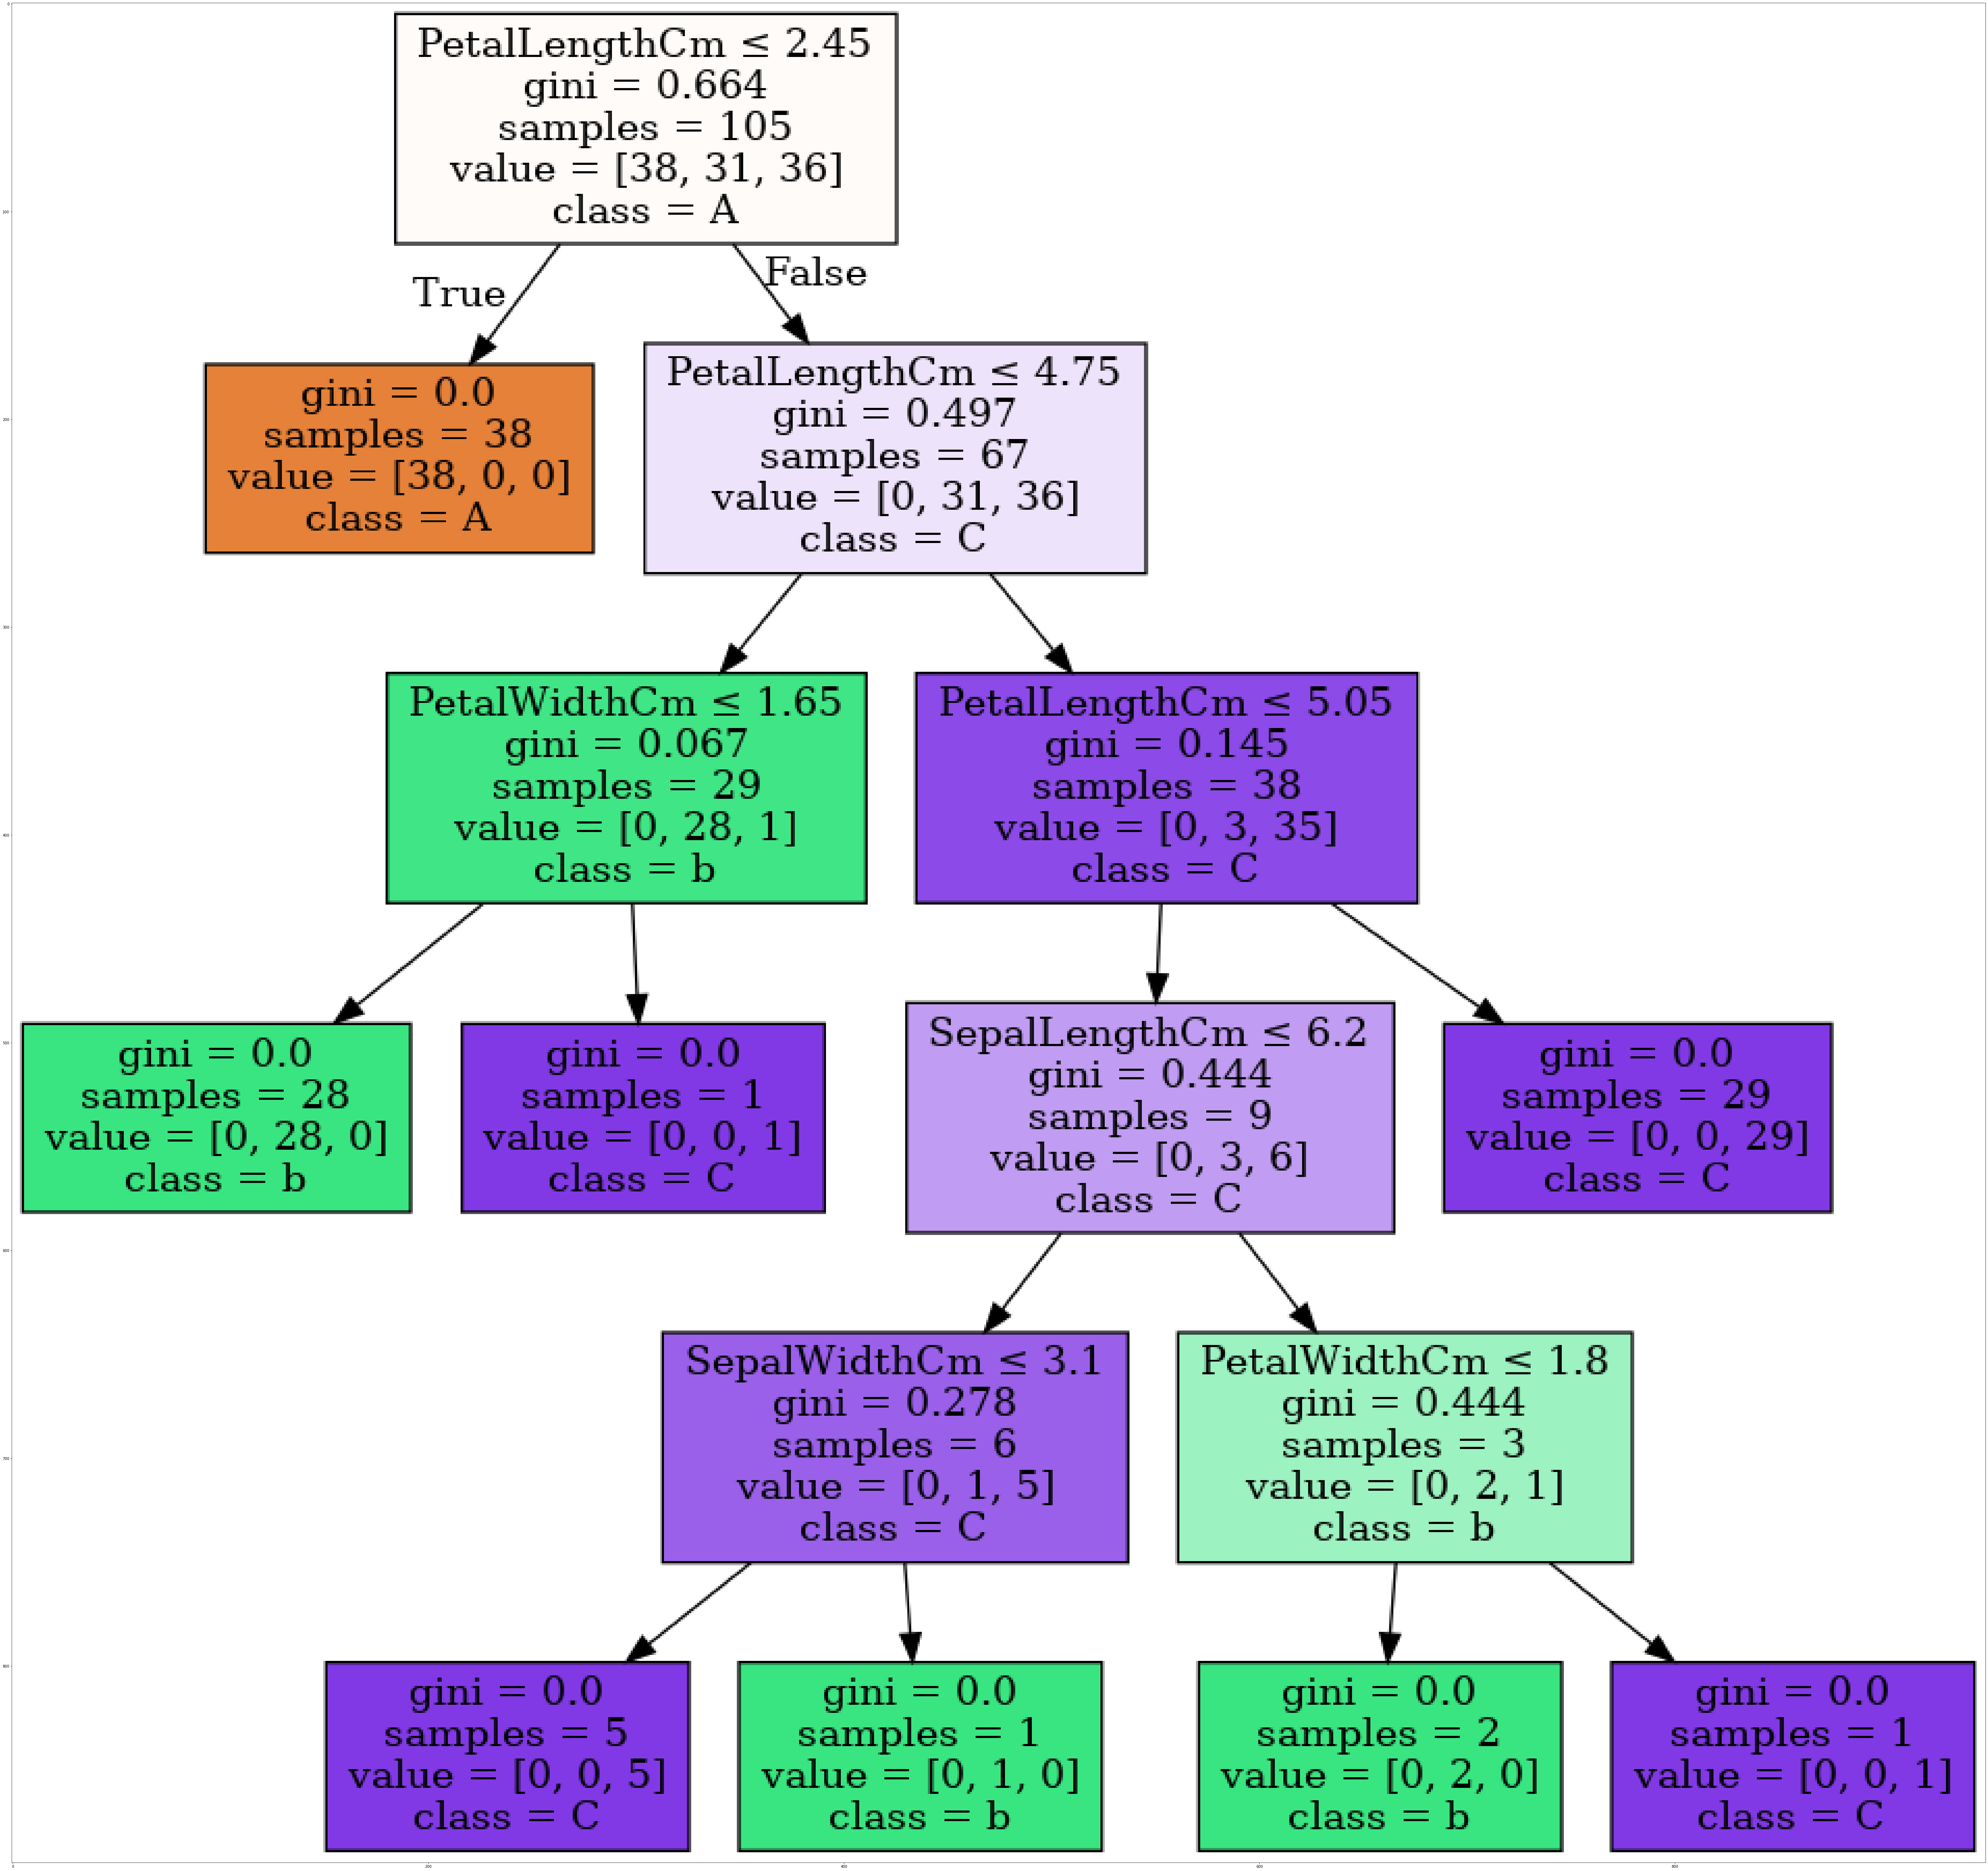

In [44]:
from io import StringIO
from sklearn import tree
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns
out=tree.export_graphviz(dsc,feature_names=featureNames, out_file=dot_data, class_names= ['A','b','C'], filled=True,special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')
